In [826]:
# Importing all the required packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
# hide warnings
import warnings
warnings.filterwarnings('ignore')

# 1. Reading and analysing the data

In [827]:
#reading the data
data=pd.read_csv('train.csv')   # The csv file should be in the same directory as that of python notebook
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [828]:
# getting total rows and columns
data.shape

(1460, 81)

In [829]:
#Checking the nulls and datatypes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [830]:
# checking more details on the data
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 2. Data Cleaning

#### Treatment of null values

In [831]:
(data.isnull().sum()*100/len(data.index))[data.isnull().sum()>0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

### Removing columns with more than 85% data nulls

Alley <br>
PoolQC <br>
MiscFeature

In [832]:
data.drop(['Alley','PoolQC','MiscFeature'],axis=1,inplace = True)

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,NaN,0,12,2008,WD,Normal,250000


In [833]:
# check for null values in categorical columns

data.select_dtypes(include='object').isnull().sum()[data.select_dtypes(include='object').isnull().sum()>0]

MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
Fence           1179
dtype: int64

In [834]:
# Replace NA with None in the categorical columns below :

for col in ('MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu',
            'GarageType','GarageFinish','GarageQual','GarageCond','Fence'):
    
    data[col]=data[col].fillna('None')

In [835]:
#Checking remaining null value columns
(data.isnull().sum()*100/len(data.index))[data.isnull().sum()>0]

LotFrontage    17.739726
MasVnrArea      0.547945
GarageYrBlt     5.547945
dtype: float64

In [836]:
# Will check these columns one by one
data['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [837]:
data['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [838]:
data['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [839]:
#As per the data dictionary these vriables are significant hence we will impute them with median values

data['LotFrontage'] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
data["GarageYrBlt"].fillna(data["GarageYrBlt"].median(), inplace=True)
data["MasVnrArea"].fillna(data["MasVnrArea"].median(), inplace=True)

In [840]:
(data.isnull().sum()*100/len(data.index))[data.isnull().sum()>0]

Series([], dtype: float64)

### Outlier Check

In [841]:
data['MSSubClass'] = data['MSSubClass'].astype('object')
data['OverallQual'] = data['OverallQual'].astype('object')
data['OverallCond'] = data['OverallCond'].astype('object')
data['BsmtFullBath'] = data['BsmtFullBath'].astype('object')
data['BsmtHalfBath'] = data['BsmtHalfBath'].astype('object')
data['FullBath'] = data['FullBath'].astype('object')
data['HalfBath'] = data['HalfBath'].astype('object')
data['BedroomAbvGr'] = data['BedroomAbvGr'].astype('object')
data['KitchenAbvGr'] = data['KitchenAbvGr'].astype('object')
data['TotRmsAbvGrd'] = data['TotRmsAbvGrd'].astype('object')
data['Fireplaces'] = data['Fireplaces'].astype('object')
data['GarageCars'] = data['GarageCars'].astype('object')
data['YearBuilt'] = data['YearBuilt'].astype('object')
data['YearRemodAdd'] = data['YearRemodAdd'].astype('object')
data['GarageYrBlt'] = data['GarageYrBlt'].astype('object')
data['YrSold'] = data['YrSold'].astype('object')

In [842]:
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.199658,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,180921.195890
std,421.610009,22.431902,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,79442.502883
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000
25%,365.750000,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000
50%,730.500000,70.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000
90%,1314.100000,92.000000,14381.700000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,...,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,278000.000000
95%,1387.050000,104.000000,17401.150000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,...,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,326100.000000
99%,1445.410000,137.410000,37567.640000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,...,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,442567.010000


In [843]:
# Removing Outliers

# Removing values beyond 99% for LotArea

LotArea = data['LotArea'].quantile(0.95)
data = data[data["LotArea"] < LotArea]

print(data.shape)
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

(1387, 78)


,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
count,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,...,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000
mean,729.215573,68.924297,9225.405191,100.031723,428.285508,42.771449,568.545061,1039.602019,1142.886806,338.979813,...,466.206921,90.688536,44.925018,21.602019,3.033886,14.484499,1.656813,38.524874,6.322278,177676.817592
std,421.519674,19.549684,3168.622150,172.361919,422.719920,151.343966,442.874866,408.976437,361.997209,426.599401,...,209.654088,119.753081,63.363744,59.376573,28.118968,54.267737,30.922081,457.323427,2.687546,75245.749436
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000
25%,366.500000,60.000000,7411.000000,0.000000,0.000000,0.000000,226.000000,790.500000,873.000000,0.000000,...,312.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129000.000000
50%,732.000000,70.000000,9247.000000,0.000000,378.000000,0.000000,479.000000,980.000000,1074.000000,0.000000,...,474.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,160000.000000
75%,1092.500000,80.000000,11208.500000,163.500000,697.000000,0.000000,802.000000,1267.500000,1360.000000,726.000000,...,576.000000,168.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,210000.000000
90%,1314.400000,91.000000,13318.400000,320.000000,1027.200000,96.000000,1235.200000,1580.000000,1652.800000,928.400000,...,748.400000,250.000000,128.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,274940.000000
95%,1385.700000,100.000000,14539.500000,440.800000,1233.100000,374.700000,1476.400000,1728.000000,1790.800000,1118.800000,...,840.000000,323.400000,168.000000,179.100000,0.000000,155.700000,0.000000,0.000000,11.000000,320000.000000
99%,1445.140000,122.280000,16570.500000,766.280000,1521.080000,720.700000,1800.000000,2111.540000,2122.120000,1350.120000,...,947.980000,474.280000,263.680000,254.700000,154.260000,265.140000,0.000000,700.000000,12.000000,425028.200000


In [844]:
BsmtFinSF1 = data['BsmtFinSF1'].quantile(0.99)
data = data[data["BsmtFinSF1"] < BsmtFinSF1]


print(data.shape)
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

(1373, 78)


,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
count,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,...,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000
mean,729.183540,68.749454,9201.831027,96.601602,415.206846,42.815004,571.865259,1029.887109,1134.640932,340.932265,...,463.286235,90.024035,44.882010,21.822287,3.064822,14.233795,1.269483,38.917698,6.319738,175631.903132
std,421.846686,19.320194,3162.637064,166.102565,403.929245,151.465862,443.425139,397.400916,353.179709,424.947154,...,207.666714,119.560969,63.598727,59.638431,28.260389,53.941510,27.250435,459.634146,2.685214,71139.139523
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000
25%,366.000000,60.000000,7399.000000,0.000000,0.000000,0.000000,230.000000,788.000000,869.000000,0.000000,...,312.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,128950.000000
50%,732.000000,70.000000,9236.000000,0.000000,371.000000,0.000000,484.000000,976.000000,1071.000000,0.000000,...,472.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,159895.000000
75%,1092.000000,80.000000,11198.000000,160.000000,690.000000,0.000000,806.000000,1258.000000,1344.000000,728.000000,...,576.000000,166.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,207500.000000
90%,1315.800000,90.000000,13280.200000,312.000000,1002.800000,96.000000,1237.000000,1564.600000,1639.200000,928.800000,...,736.000000,250.000000,128.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,270000.000000
95%,1386.400000,100.000000,14445.200000,425.000000,1200.000000,374.400000,1480.800000,1709.400000,1757.600000,1117.600000,...,837.200000,322.800000,168.000000,180.000000,0.000000,154.400000,0.000000,0.000000,11.000000,316090.000000
99%,1445.280000,122.000000,16581.000000,681.960000,1413.360000,728.400000,1800.000000,2035.520000,2073.840000,1347.560000,...,936.000000,474.560000,265.360000,255.400000,155.520000,265.280000,0.000000,700.000000,12.000000,410700.000000


In [845]:
MasVnrArea = data['MasVnrArea'].quantile(0.99)
data = data[data["MasVnrArea"] < MasVnrArea]


print(data.shape)
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

(1359, 78)


,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,...,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,729.905077,68.635762,9184.469463,87.925681,415.850625,43.161884,566.854305,1025.866814,1131.573216,336.326711,...,460.772627,89.406917,44.816041,22.019868,3.096394,14.234731,1.282561,39.318617,6.320824,174221.208977
std,421.365232,19.253315,3150.744799,141.369692,403.907890,152.169017,437.345638,392.937657,348.809596,421.937345,...,206.398090,119.293199,63.737680,59.905279,28.403965,53.971070,27.390235,461.980246,2.689931,69308.438565
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000
25%,367.500000,60.000000,7389.000000,0.000000,0.000000,0.000000,228.000000,784.000000,866.000000,0.000000,...,308.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,128500.000000
50%,732.000000,70.000000,9200.000000,0.000000,371.000000,0.000000,483.000000,972.000000,1068.000000,0.000000,...,471.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,159000.000000
75%,1092.500000,80.000000,11165.000000,150.500000,690.000000,0.000000,800.000000,1254.500000,1344.000000,720.000000,...,576.000000,164.500000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,205975.000000
90%,1315.200000,90.000000,13137.400000,300.400000,1003.200000,97.800000,1232.000000,1560.200000,1632.400000,915.600000,...,722.800000,250.000000,128.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,267200.000000
95%,1386.100000,99.100000,14442.800000,391.500000,1200.000000,375.200000,1468.000000,1700.400000,1742.000000,1106.500000,...,836.000000,322.200000,168.100000,180.300000,0.000000,154.100000,0.000000,0.000000,11.000000,314831.700000
99%,1445.420000,122.000000,16591.500000,588.200000,1415.040000,736.100000,1775.260000,2000.840000,2048.940000,1338.300000,...,925.680000,474.840000,267.040000,256.100000,156.780000,265.420000,0.000000,700.000000,12.000000,398301.620000


In [846]:
OpenPorchSF = data['OpenPorchSF'].quantile(0.99)
data = data[data["OpenPorchSF"] < OpenPorchSF]


print(data.shape)
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

(1345, 78)


,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
count,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,...,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000
mean,728.800743,68.643123,9180.946468,87.778439,415.230483,43.377695,566.452788,1025.060967,1131.153903,333.574721,...,460.823792,89.402974,41.625279,22.034201,3.128625,14.026022,1.295911,38.515985,6.316729,174000.777695
std,422.500768,19.303713,3155.770876,141.001910,403.750924,152.769430,438.133675,393.906034,349.085891,419.347522,...,205.907423,118.696791,54.996571,60.050415,28.549752,52.723843,27.532208,463.219304,2.688306,68773.832148
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35311.000000
25%,363.000000,60.000000,7388.000000,0.000000,0.000000,0.000000,227.000000,784.000000,866.000000,0.000000,...,308.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,128500.000000
50%,731.000000,70.000000,9200.000000,0.000000,371.000000,0.000000,482.000000,971.000000,1068.000000,0.000000,...,471.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,159000.000000
75%,1093.000000,80.000000,11170.000000,150.000000,689.000000,0.000000,799.000000,1256.000000,1342.000000,720.000000,...,576.000000,165.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,205000.000000
90%,1315.600000,90.000000,13129.200000,300.000000,1003.600000,101.400000,1232.000000,1560.600000,1633.200000,912.600000,...,721.600000,248.000000,120.600000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,266000.000000
95%,1386.800000,99.800000,14448.400000,385.800000,1199.600000,376.600000,1468.000000,1699.600000,1742.000000,1100.800000,...,834.000000,321.800000,158.000000,182.400000,0.000000,153.600000,0.000000,0.000000,11.000000,312900.000000
99%,1445.560000,122.000000,16602.000000,589.600000,1416.720000,743.800000,1775.680000,2001.120000,2049.920000,1331.120000,...,926.240000,471.360000,234.000000,256.800000,158.040000,262.800000,0.000000,700.000000,12.000000,394831.480000


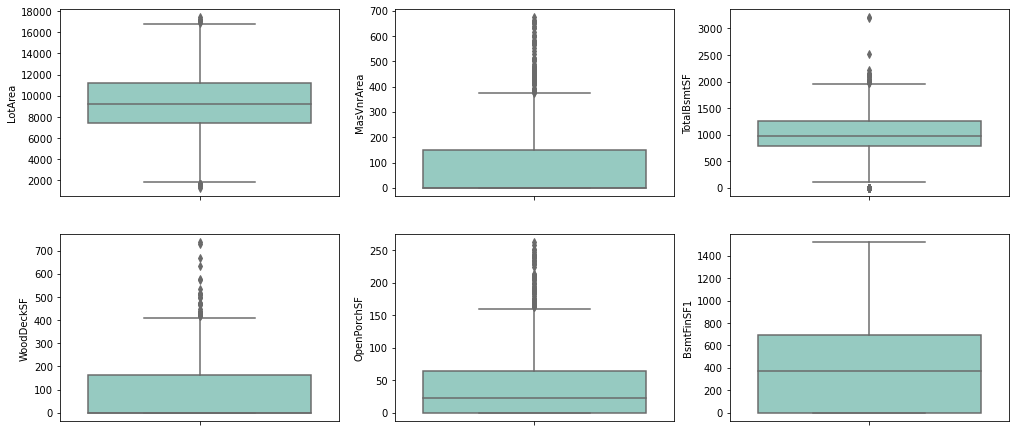

In [847]:
# Plotting the numerical variables

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = data)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = data)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = data)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = data)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = data)
plt.subplot(5,3,6)
sns.boxplot(y = 'BsmtFinSF1', palette='Set3', data = data)
plt.show()

In [848]:
data.select_dtypes(include=['int64','float64']).columns


Index(['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice'],
      dtype='object')

In [849]:
data.select_dtypes(include=['object']).columns


Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence',
       'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

## Plotting categorical variables with SalePrice

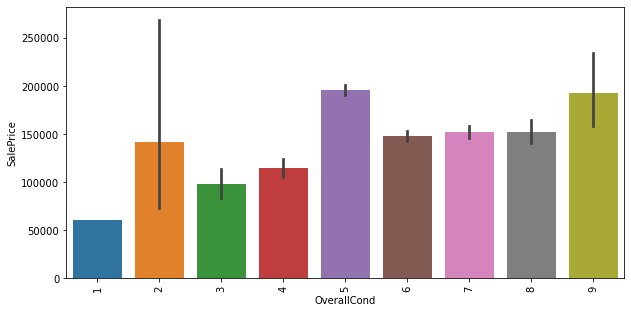

In [850]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='OverallCond',y='SalePrice')
plt.xticks(rotation=90)
plt.show()

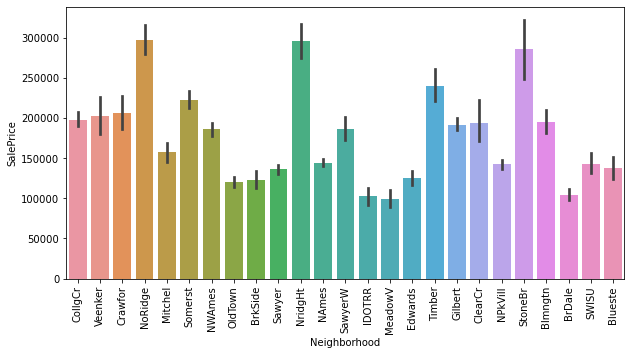

In [851]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='Neighborhood',y='SalePrice')
plt.xticks(rotation=90)
plt.show()

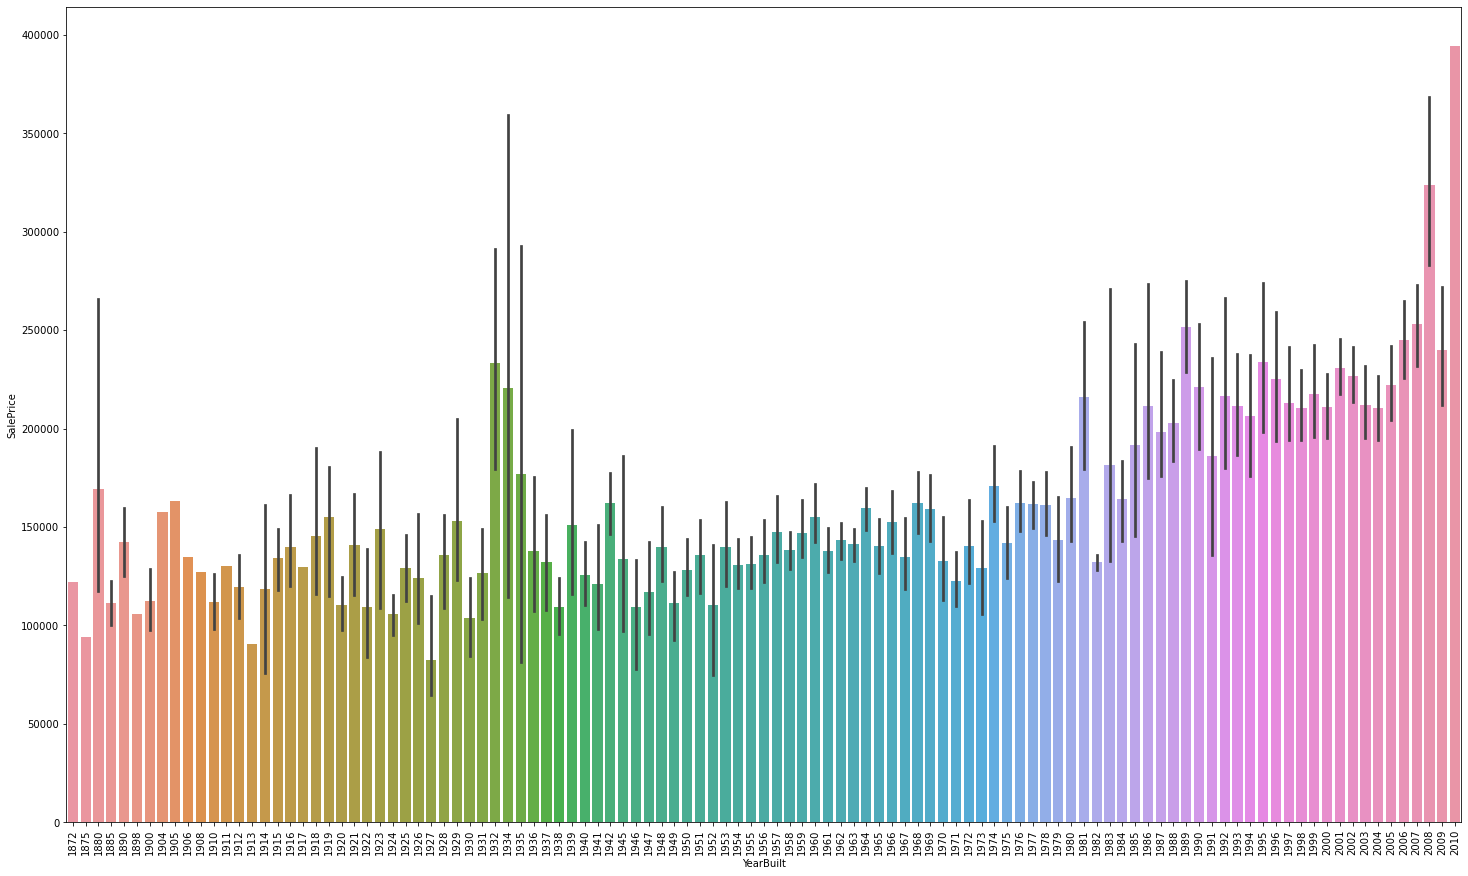

In [852]:
plt.figure(figsize=(25,15))
sns.barplot(data=data,x='YearBuilt',y='SalePrice')
plt.xticks(rotation=90)
plt.show()

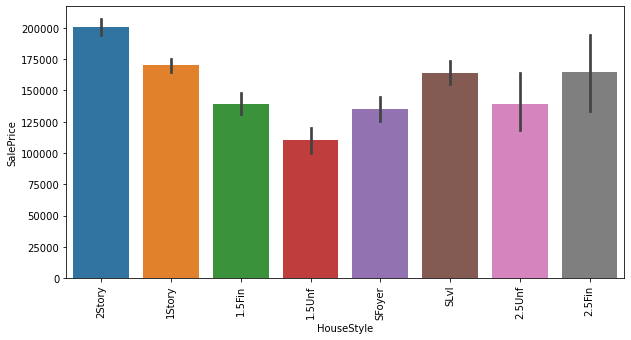

In [853]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='HouseStyle',y='SalePrice')
plt.xticks(rotation=90)
plt.show()

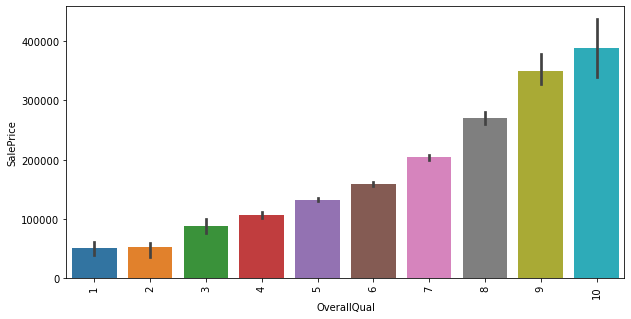

In [854]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='OverallQual',y='SalePrice')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

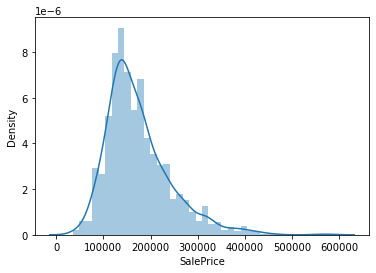

In [855]:
sns.distplot(data['SalePrice'])

In [856]:
#Log Transformation due to skewness
data['SalePrice']=np.log1p(data['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

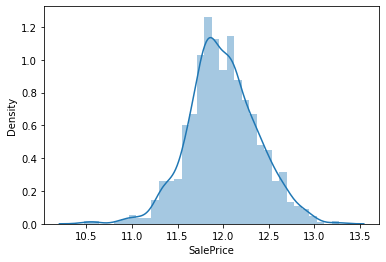

In [857]:
sns.distplot(data['SalePrice'])

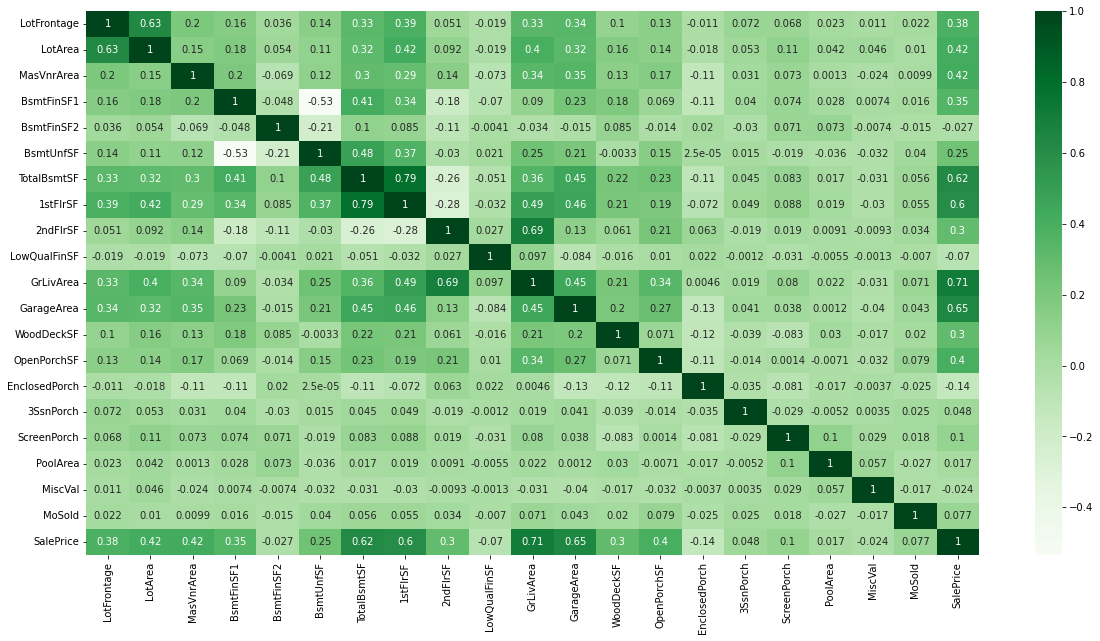

In [858]:
# Check the correlation of numerical columns

plt.figure(figsize = (20, 10))
sns.heatmap(data_numeric.corr(), annot = True, cmap="Greens")
plt.show()

<Figure size 1440x864 with 0 Axes>

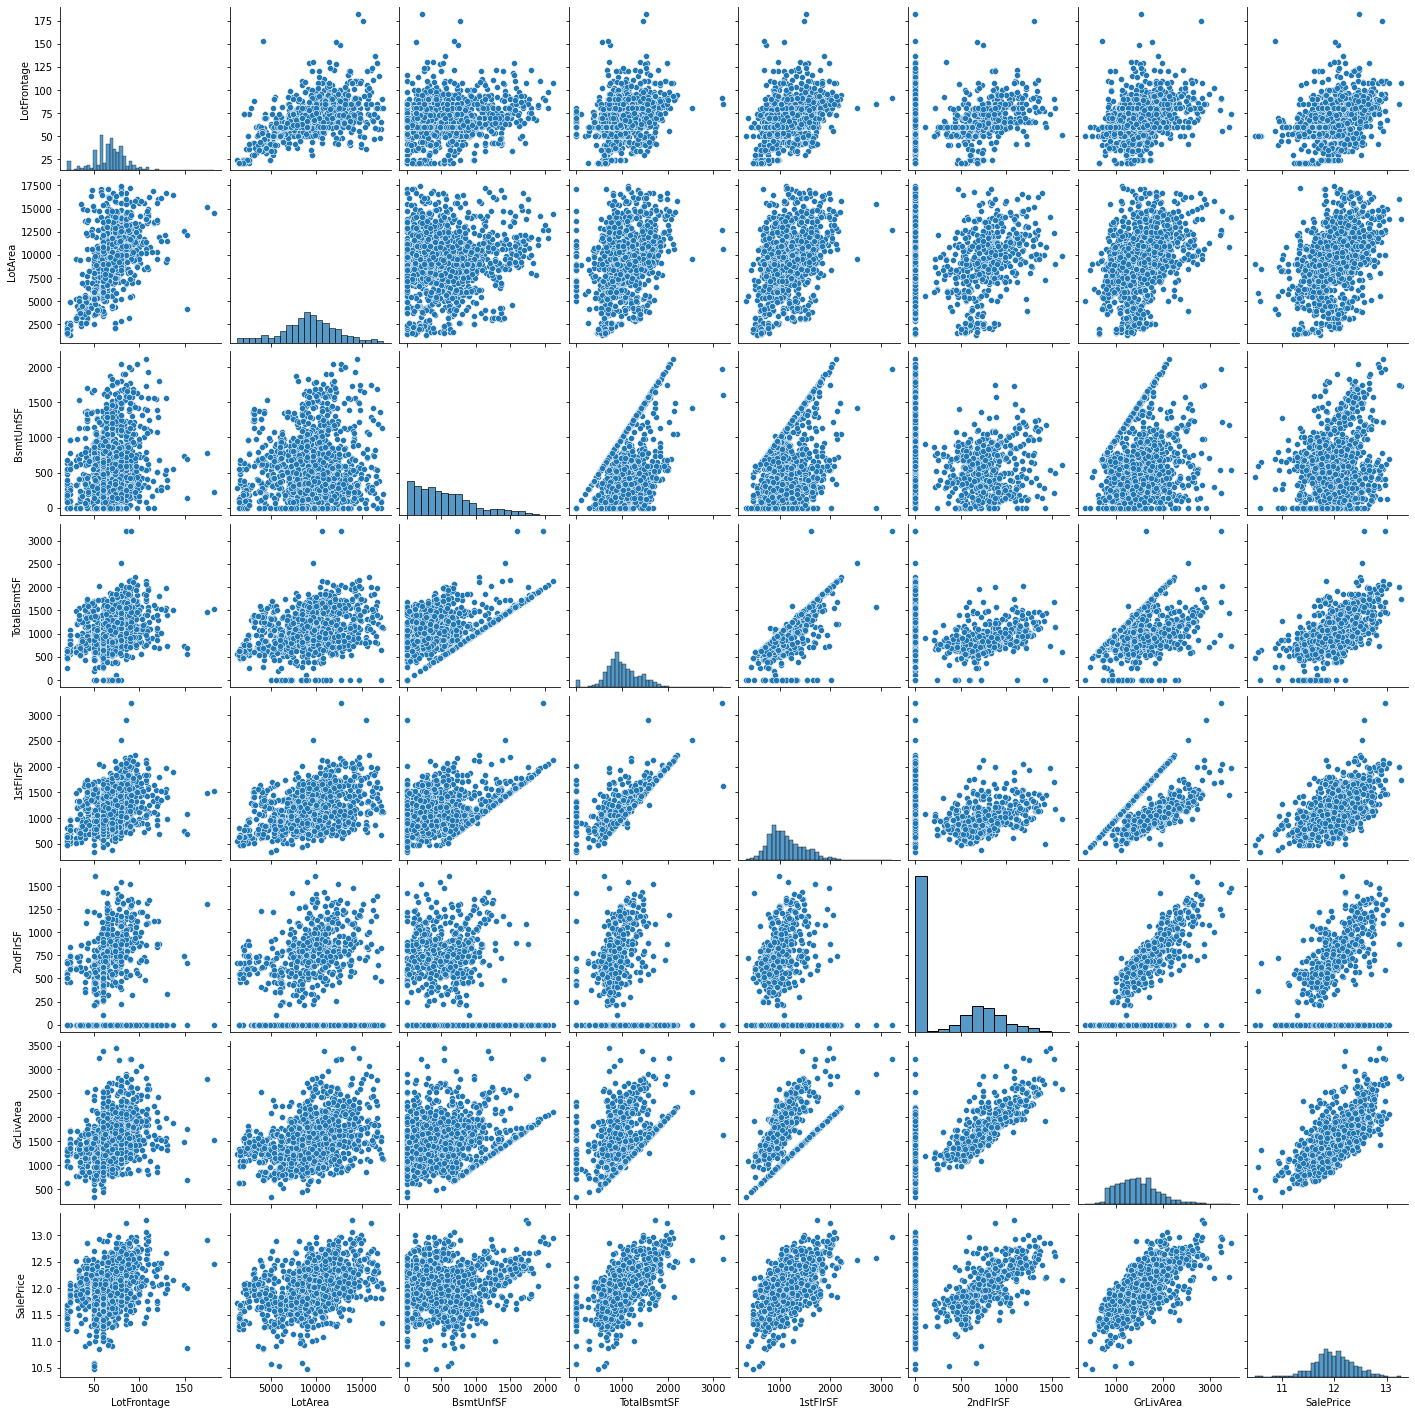

In [859]:
# Checking the same with a pairplot 
plt.figure(figsize=(20,12))
sns.pairplot(data,vars=['LotFrontage', 'LotArea',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea',
       'SalePrice'])
plt.show()

In [860]:
# dropping the variables with high correlation amonth themselves
data = data.drop(['LotFrontage'], axis = 1)    
data = data.drop(['1stFlrSF'], axis = 1)   
data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,None,0,2,2008,WD,Normal,12.247699
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,None,0,5,2007,WD,Normal,12.109016
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,None,0,9,2008,WD,Normal,12.317171
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,None,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,None,0,12,2008,WD,Normal,12.429220


In [861]:
# PropAge -  Property Age from yearsold - yearbuilt
data['Age'] = (data['YrSold'] - data['YearBuilt'])
data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,None,0,2,2008,WD,Normal,12.247699,5
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,None,0,5,2007,WD,Normal,12.109016,31
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,None,0,9,2008,WD,Normal,12.317171,7
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,None,0,2,2006,WD,Abnorml,11.849405,91
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,None,0,12,2008,WD,Normal,12.429220,8


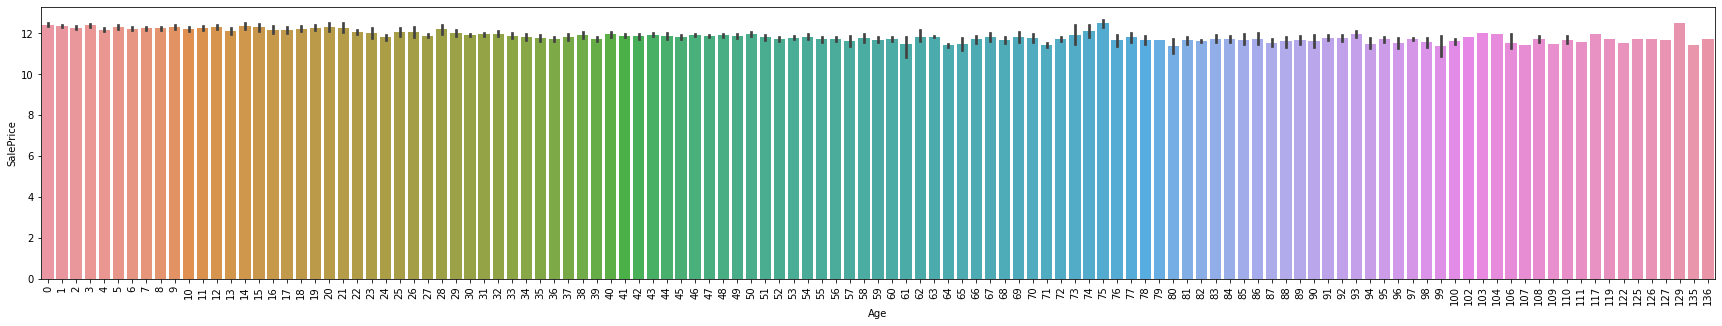

In [862]:
plt.figure(figsize=(30,5))
sns.barplot(data=data,x='Age',y='SalePrice')
plt.xticks(rotation=90)
plt.show()

In [863]:
data = data.drop(['MoSold'], axis = 1)
data = data.drop(['YrSold'], axis = 1)
data = data.drop(['YearBuilt'], axis = 1)
data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,None,0,WD,Normal,12.247699,5
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,None,0,WD,Normal,12.109016,31
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,None,0,WD,Normal,12.317171,7
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,None,0,WD,Abnorml,11.849405,91
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,None,0,WD,Normal,12.429220,8


In [864]:
category_data=data.select_dtypes(include=['object'])
category_data

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition,Age
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2003.0,RFn,2,TA,TA,Y,None,WD,Normal,5
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,1976.0,RFn,2,TA,TA,Y,None,WD,Normal,31
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2001.0,RFn,2,TA,TA,Y,None,WD,Normal,7
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,1998.0,Unf,3,TA,TA,Y,None,WD,Abnorml,91
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,2000.0,RFn,3,TA,TA,Y,None,WD,Normal,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,1999.0,RFn,2,TA,TA,Y,None,WD,Normal,8
1456,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,1978.0,Unf,2,TA,TA,Y,MnPrv,WD,Normal,32
1457,70,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,1941.0,RFn,1,TA,TA,Y,GdPrv,WD,Normal,69
1458,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,1950.0,Unf,1,TA,TA,Y,None,WD,Normal,60


In [865]:
# to check if a variable has very high frequency of 1 value as it can skew the analysis
for column in category_data:
    print(data[column].value_counts())
    

20     494
60     266
50     137
120     83
30      66
160     61
70      55
80      53
90      49
190     26
85      20
45      12
75      10
180     10
40       3
Name: MSSubClass, dtype: int64
RL         1053
RM          208
FV           60
RH           16
C (all)       8
Name: MSZoning, dtype: int64
Pave    1342
Grvl       3
Name: Street, dtype: int64
Reg    879
IR1    435
IR2     26
IR3      5
Name: LotShape, dtype: int64
Lvl    1230
Bnk      56
HLS      39
Low      20
Name: LandContour, dtype: int64
AllPub    1344
NoSeWa       1
Name: Utilities, dtype: int64
Inside     984
Corner     241
CulDSac     73
FR2         43
FR3          4
Name: LotConfig, dtype: int64
Gtl    1290
Mod      52
Sev       3
Name: LandSlope, dtype: int64
NAmes      212
CollgCr    150
OldTown    105
Edwards     95
Somerst     80
Gilbert     72
Sawyer      70
NWAmes      68
NridgHt     64
SawyerW     59
BrkSide     56
Crawfor     45
Mitchel     40
IDOTRR      35
Timber      33
NoRidge     31
SWISU       25
Sto

In [866]:
#dropping the variable with 1 high value frequency

data = data.drop(['Street'], axis = 1)
data = data.drop(['Utilities'], axis = 1)
data = data.drop(['RoofMatl'], axis = 1)
data = data.drop(['Condition2'], axis = 1)
data = data.drop(['Heating'], axis = 1)

In [867]:
data.head()

,Id,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,None,0,WD,Normal,12.247699,5
1,2,20,RL,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,None,0,WD,Normal,12.109016,31
2,3,60,RL,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,None,0,WD,Normal,12.317171,7
3,4,70,RL,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,272,0,0,0,None,0,WD,Abnorml,11.849405,91
4,5,60,RL,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,0,0,0,0,None,0,WD,Normal,12.429220,8


In [868]:
# Drop 'Id' from Dataframe

data = data.drop(['Id'], axis=1)
data.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,SaleType,SaleCondition,SalePrice,Age
0,60,RL,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,0,0,0,0,None,0,WD,Normal,12.247699,5
1,20,RL,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,...,0,0,0,0,None,0,WD,Normal,12.109016,31
2,60,RL,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,0,0,0,0,None,0,WD,Normal,12.317171,7
3,70,RL,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,...,272,0,0,0,None,0,WD,Abnorml,11.849405,91
4,60,RL,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,...,0,0,0,0,None,0,WD,Normal,12.429220,8


In [869]:
#creating numerical and categorical data
numerical_data=data.select_dtypes(include=['int64','float64'])
numerical_data
category_data=data.select_dtypes(include=['object'])
category_data

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,...,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition,Age
0,60,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,...,2003.0,RFn,2,TA,TA,Y,None,WD,Normal,5
1,20,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,...,1976.0,RFn,2,TA,TA,Y,None,WD,Normal,31
2,60,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,...,2001.0,RFn,2,TA,TA,Y,None,WD,Normal,7
3,70,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,...,1998.0,Unf,3,TA,TA,Y,None,WD,Abnorml,91
4,60,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,...,2000.0,RFn,3,TA,TA,Y,None,WD,Normal,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Reg,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,2Story,...,1999.0,RFn,2,TA,TA,Y,None,WD,Normal,8
1456,20,RL,Reg,Lvl,Inside,Gtl,NWAmes,Norm,1Fam,1Story,...,1978.0,Unf,2,TA,TA,Y,MnPrv,WD,Normal,32
1457,70,RL,Reg,Lvl,Inside,Gtl,Crawfor,Norm,1Fam,2Story,...,1941.0,RFn,1,TA,TA,Y,GdPrv,WD,Normal,69
1458,20,RL,Reg,Lvl,Inside,Gtl,NAmes,Norm,1Fam,1Story,...,1950.0,Unf,1,TA,TA,Y,None,WD,Normal,60


In [870]:
numerical_columns=list(numerical_data.columns)
numerical_data.columns

Index(['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'],
      dtype='object')

In [871]:
categorical_columns=list(category_data.columns)
categorical_columns

['MSSubClass',
 'MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'SaleType',
 'SaleCondition',
 'Age']

In [872]:
# convert into dummies
data_dummies = pd.get_dummies(category_data, drop_first=True)
data_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,Age_111,Age_117,Age_119,Age_122,Age_125,Age_126,Age_127,Age_129,Age_135,Age_136
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [873]:
# drop categorical variables 
data1 = data.drop(categorical_columns, axis=1)
data = pd.concat([data1, data_dummies], axis=1)
data.shape

(1345, 551)

In [874]:
# creating X and y data
X=data.drop(['SalePrice'],axis=1)


In [875]:
y=data['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

# Model building and evaluation

In [876]:
# Splitting the data in train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [877]:
# 1. Instantiate the object
scaler = StandardScaler()

# 2. Create a list of numerical vars
num_vars=['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal']

# 3. Fit on data
X_train[num_vars]=scaler.fit_transform(X_train[num_vars])
X_train.head()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,...,Age_111,Age_117,Age_119,Age_122,Age_125,Age_126,Age_127,Age_129,Age_135,Age_136
867,-0.725644,-0.622481,1.257791,-0.277222,-1.037436,0.024296,-0.781499,-0.120294,-0.770877,0.386686,...,0,0,0,0,0,0,0,0,0,0
1129,-0.651677,0.683242,1.267634,-0.277222,-1.281949,-0.232145,-0.781499,-0.120294,-1.173827,1.017895,...,0,0,0,0,0,0,0,0,0,0
569,-0.705705,-0.622481,1.284860,-0.277222,-1.281949,-0.214884,-0.781499,-0.120294,-1.158498,0.662840,...,0,0,0,0,0,0,0,0,0,0
164,-1.230543,-0.622481,-0.125225,-0.277222,0.481718,0.293066,0.346252,-0.120294,0.315336,-1.230785,...,0,0,0,0,0,0,0,0,0,0
1106,0.363589,-0.622481,0.780379,-0.277222,-0.892539,-0.296255,-0.781499,-0.120294,-0.065715,1.249666,...,0,0,0,0,0,0,0,0,0,0


In [878]:
# Ridge
# list of alphas to tune
params = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.003,0,20,30,40]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.003, 0, 20,
                                   30, 40]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [879]:
model_cv.best_params_

{'alpha': 20}

In [880]:
cv_results = pd.DataFrame(model_cv.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.026501,0.003194,0.007904,0.002062,0.0001,{'alpha': 0.0001},-0.141396,-0.154102,-0.143204,-0.126352,...,-0.144162,0.010573,8,-0.035947,-0.032317,-0.029873,-0.033692,-0.029951,-0.032356,0.002308
1,0.027106,0.005024,0.007603,0.001744,0.0005,{'alpha': 0.0005},-0.140214,-0.150614,-0.140926,-0.125627,...,-0.142336,0.009973,7,-0.035981,-0.032473,-0.029885,-0.033727,-0.029980,-0.032409,0.002314
2,0.028600,0.005393,0.008706,0.002274,0.001,{'alpha': 0.001},-0.138712,-0.150251,-0.138567,-0.124851,...,-0.141004,0.009930,6,-0.036025,-0.032549,-0.029909,-0.033774,-0.030017,-0.032455,0.002320
3,0.023303,0.004766,0.007104,0.001434,0.005,{'alpha': 0.005},-0.129487,-0.147482,-0.129967,-0.120072,...,-0.134428,0.010348,4,-0.036374,-0.032774,-0.030176,-0.034137,-0.030431,-0.032778,0.002326
4,0.029514,0.004362,0.007004,0.002002,0.003,{'alpha': 0.003},-0.133317,-0.149107,-0.132447,-0.122202,...,-0.136906,0.010091,5,-0.036203,-0.032689,-0.030034,-0.033962,-0.030189,-0.032615,0.002334


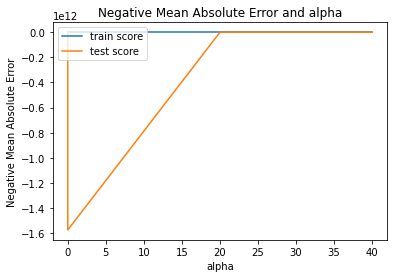

In [881]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### Running the model for different alpha values

In [882]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=20)

In [883]:

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9431909150624724

In [884]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.9378722311095248

In [885]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9525688197357978

In [886]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.9534957814311005

In [887]:
alpha = 1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9703407632385858

In [888]:
alpha = 1
ridge = Ridge(alpha=alpha)
ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.9848748684435479

In [889]:
alpha = 25
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9396452919546646

In [890]:
alpha = 25
ridge = Ridge(alpha=alpha)
ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.9320769435113476

In [891]:
alpha = 40
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9312495835438346

In [892]:
alpha = 40
ridge = Ridge(alpha=alpha)
ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

0.9187573797446795
RMSE : 0.1109277863374635


In [893]:
alpha = 0.005
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9780022537066335

In [894]:
alpha = 0.005
ridge = Ridge(alpha=alpha)
ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.9996487166902993

In [895]:
# ridge regression
ridge = Ridge(alpha=20)
ridge.fit(X_train, y_train)

# predict
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

ridge.fit(X_test, y_test)
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))


0.9431909150624724
0.9378722311095248


In [896]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.09700436212730194


In [897]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 10.982),
 ('LotArea', 0.0),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.0),
 ('2ndFlrSF', -0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.0),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', -0.0),
 ('MSSubClass_30', -0.026),
 ('MSSubClass_40', 0.0),
 ('MSSubClass_45', -0.001),
 ('MSSubClass_50', -0.004),
 ('MSSubClass_60', -0.01),
 ('MSSubClass_70', 0.013),
 ('MSSubClass_75', -0.0),
 ('MSSubClass_80', 0.002),
 ('MSSubClass_85', 0.011),
 ('MSSubClass_90', -0.013),
 ('MSSubClass_120', 0.016),
 ('MSSubClass_160', -0.007),
 ('MSSubClass_180', -0.01),
 ('MSSubClass_190', 0.006),
 ('MSZoning_FV', 0.03),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.029),
 ('MSZoning_RM', -0.008),
 ('LotShape_IR2', 0.004),
 ('LotShape_IR3', -0.006),
 ('LotShape_Reg', -0.004),
 ('LandContour_HLS', 0.011),
 ('LandConto

In [898]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))
para = pd.DataFrame(mod_ridge)
para.columns = ['Variable', 'Coeff']
param=para[(para['Coeff'] != 0)].sort_values((['Coeff']), axis = 0, ascending = False)

In [899]:
param['Coeff1']=np.abs(param['Coeff'])
param.sort_values(['Coeff'],axis=0, ascending=False).head(20)

,Variable,Coeff,Coeff1
0,constant,10.982,10.982
53,Neighborhood_Crawfor,0.070,0.070
244,CentralAir_Y,0.063,0.063
106,OverallCond_8,0.043,0.043
98,OverallQual_9,0.039,0.039
212,Foundation_PConc,0.037,0.037
68,Neighborhood_Somerst,0.036,0.036
413,GarageCond_TA,0.035,0.035
105,OverallCond_7,0.035,0.035
288,Functional_Typ,0.034,0.034


### We have got a decent model using Ridge, now we will test for Lasso

In [900]:
# Lasso
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.003, 0, 20,
                                   30, 40]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [901]:
model_cv.best_params_

{'alpha': 0.0005}

In [902]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.197540,0.087344,0.007803,0.001830,0.0001,{'alpha': 0.0001},-0.078011,-0.091588,-0.094784,-0.086791,...,-0.087300,0.005742,3,-0.047885,-0.045249,-0.043042,-0.045779,-0.044749,-0.045341,0.001569
1,0.059523,0.019712,0.007601,0.002060,0.0005,{'alpha': 0.0005},-0.073506,-0.081486,-0.094675,-0.071825,...,-0.079869,0.008138,1,-0.064322,-0.062045,-0.060743,-0.064412,-0.061808,-0.062666,0.001457
2,0.034603,0.007551,0.007003,0.001446,0.001,{'alpha': 0.001},-0.077218,-0.084832,-0.098683,-0.076040,...,-0.083312,0.008259,2,-0.072362,-0.070740,-0.068658,-0.072306,-0.070087,-0.070830,0.001400
3,0.026904,0.006726,0.007106,0.001912,0.005,{'alpha': 0.005},-0.094960,-0.102180,-0.113740,-0.094361,...,-0.098795,0.008607,5,-0.094111,-0.093093,-0.089808,-0.094172,-0.094105,-0.093058,0.001674
4,0.022907,0.001431,0.006103,0.001026,0.003,{'alpha': 0.003},-0.087926,-0.095709,-0.107141,-0.088826,...,-0.092718,0.008140,4,-0.087089,-0.085103,-0.081529,-0.087569,-0.085773,-0.085413,0.002134
5,0.344283,0.016519,0.006382,0.001018,0,{'alpha': 0},-0.134214,-0.157164,-0.132195,-0.122238,...,-0.137754,0.011731,6,-0.036275,-0.032812,-0.030322,-0.034081,-0.030775,-0.032853,0.002188
6,0.017803,0.003185,0.007000,0.001675,20,{'alpha': 20},-0.287525,-0.306720,-0.305475,-0.274346,...,-0.293704,0.012012,7,-0.295111,-0.290041,-0.290884,-0.298149,-0.293465,-0.293530,0.002933
7,0.019301,0.002996,0.005602,0.000802,30,{'alpha': 30},-0.287525,-0.306720,-0.305475,-0.274346,...,-0.293704,0.012012,7,-0.295111,-0.290041,-0.290884,-0.298149,-0.293465,-0.293530,0.002933
8,0.020905,0.003076,0.005904,0.002107,40,{'alpha': 40},-0.287525,-0.306720,-0.305475,-0.274346,...,-0.293704,0.012012,7,-0.295111,-0.290041,-0.290884,-0.298149,-0.293465,-0.293530,0.002933


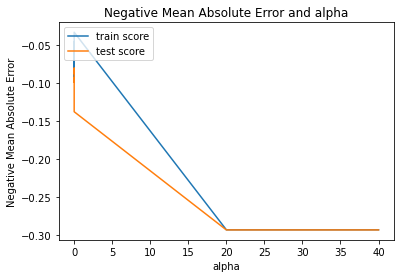

In [903]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [904]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.018073  ,  0.00196392,  0.03103254,  0.00656227, -0.        ,
        0.05491673,  0.00751704, -0.00512726,  0.11319476,  0.04466523,
        0.01005886,  0.01190658,  0.00503954,  0.        ,  0.01102573,
        0.0031868 ,  0.00617468, -0.0432695 , -0.        ,  0.        ,
       -0.00462061,  0.00750745,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.00122474, -0.03229975, -0.        ,
       -0.        ,  0.045756  ,  0.        ,  0.02288284, -0.02121062,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.0021687 , -0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.03486567, -0.0046769 ,  0.        ,
       -0.03978941, -0.06616741, -0.        , -0.01140293,  0.        ,
        0.        ,  0.        ,  0.00928059, -0.05375146, -0.        ,
       -0.        , -0.        ,  0.        ,  0.05527412,  0.  

In [905]:
y_train_pred=lasso.predict(X_train)
r2_score(y_train,y_train_pred)

0.928124235516327

In [906]:
alpha =0.001

lasso = Lasso(alpha=alpha)

lasso.fit(X_test, y_test)

y_test_pred=lasso.predict(X_test)
r2_score(y_test,y_test_pred)

0.9408877714809217

In [907]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.09462089499604986


In [908]:
alpha =0.0005

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
y_train_pred=lasso.predict(X_train)
r2_score(y_train,y_train_pred)

0.942110250247463

In [909]:
alpha =0.0005

lasso = Lasso(alpha=alpha)

lasso.fit(X_test, y_test)

y_test_pred=lasso.predict(X_test)
r2_score(y_test,y_test_pred)

0.9602076424667296

In [910]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.07763333093814175


In [911]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.075),
 ('LotArea', 0.0),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('2ndFlrSF', -0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.0),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', -0.0),
 ('MSSubClass_30', -0.052),
 ('MSSubClass_40', 0.0),
 ('MSSubClass_45', -0.0),
 ('MSSubClass_50', -0.0),
 ('MSSubClass_60', -0.0),
 ('MSSubClass_70', 0.0),
 ('MSSubClass_75', -0.0),
 ('MSSubClass_80', -0.0),
 ('MSSubClass_85', 0.0),
 ('MSSubClass_90', -0.048),
 ('MSSubClass_120', 0.0),
 ('MSSubClass_160', -0.0),
 ('MSSubClass_180', -0.0),
 ('MSSubClass_190', 0.0),
 ('MSZoning_FV', 0.017),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.044),
 ('MSZoning_RM', 0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', 0.004),
 ('LandContour_HLS', -0.0),
 ('LandContour_Low', -0.0),
 ('LandCon

In [912]:
lasso.coef_

array([ 9.28980712e-06,  3.64450548e-05,  8.50376190e-05,  1.06246995e-04,
        2.71718299e-05,  2.72135884e-05, -6.88408846e-05, -3.97150018e-04,
        3.06377291e-04,  3.25255624e-05,  4.99143833e-05,  2.66649137e-04,
       -4.53526485e-05,  3.20990022e-04,  3.45243386e-04,  1.85757791e-04,
       -6.39272812e-05, -5.22990228e-02,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -4.79927032e-02,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  1.67639796e-02,
        0.00000000e+00,  4.39178891e-02,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  3.94021983e-03, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -5.14317912e-02,  0.00000000e+00,
       -2.91509889e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  1.86022079e-02,  0.00000000e+00, -0.00000000e+00,
        1.75457386e-01, -

In [913]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.075),
 ('LotArea', 0.0),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('2ndFlrSF', -0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.0),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', -0.0),
 ('MSSubClass_30', -0.052),
 ('MSSubClass_40', 0.0),
 ('MSSubClass_45', -0.0),
 ('MSSubClass_50', -0.0),
 ('MSSubClass_60', -0.0),
 ('MSSubClass_70', 0.0),
 ('MSSubClass_75', -0.0),
 ('MSSubClass_80', -0.0),
 ('MSSubClass_85', 0.0),
 ('MSSubClass_90', -0.048),
 ('MSSubClass_120', 0.0),
 ('MSSubClass_160', -0.0),
 ('MSSubClass_180', -0.0),
 ('MSSubClass_190', 0.0),
 ('MSZoning_FV', 0.017),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.044),
 ('MSZoning_RM', 0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', 0.004),
 ('LandContour_HLS', -0.0),
 ('LandContour_Low', -0.0),
 ('LandCon

In [914]:
mod = list(zip(cols, model_parameters))
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
param=para[(para['Coeff'] != 0)].sort_values((['Coeff']), axis = 0, ascending = False)

param['Coeff1']=np.abs(param['Coeff'])
param.sort_values(['Coeff'],axis=0, ascending=False).head(20)

,Variable,Coeff,Coeff1
0,constant,11.075,11.075
53,Neighborhood_Crawfor,0.175,0.175
98,OverallQual_9,0.137,0.137
489,Age_57,0.111,0.111
109,YearRemodAdd_1952,0.109,0.109
394,GarageYrBlt_2008.0,0.092,0.092
244,CentralAir_Y,0.091,0.091
413,GarageCond_TA,0.084,0.084
68,Neighborhood_Somerst,0.080,0.080
251,BsmtFullBath_2,0.079,0.079


In [915]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

,Variable,Coeff
0,constant,11.075
53,Neighborhood_Crawfor,0.175
98,OverallQual_9,0.137
489,Age_57,0.111
109,YearRemodAdd_1952,0.109
...,...,...
464,Age_32,-0.123
56,Neighborhood_IDOTRR,-0.128
476,Age_44,-0.129
102,OverallCond_4,-0.151


### For Lasso as well, we have got the model with decent R2 values.